In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [0]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[: , 1:-1].values
y = dataset.iloc[:, -1].values

Reshape for feature scaling

In [0]:
y = y.reshape(len(y),1)

Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

Use different standard scalars for differnt coloumns

In [0]:
scy = StandardScaler()
y = scy.fit_transform(y)

Train the model

In [39]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Predict

In [40]:
scy.inverse_transform(svr.predict(sc.transform([[6.5]])))

array([170370.0204065])

Plotting the model

Text(0, 0.5, 'Salary')

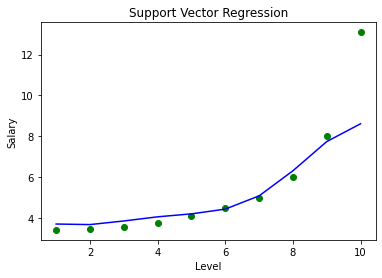

In [45]:
plt.scatter(sc.inverse_transform(x),sc.inverse_transform(y),color = "green")
plt.plot(sc.inverse_transform(x),sc.inverse_transform(svr.predict(x)),color = 'blue')
plt.title("Support Vector Regression",)
plt.xlabel("Level")
plt.ylabel("Salary")